In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [5]:
_x = np.linspace(-1, 1, 100)[:, np.newaxis]  
_noise = np.random.normal(0, 0.1, size=_x.shape)
_y = np.power(_x, 2) + _noise

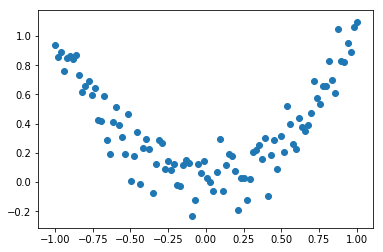

In [6]:
plt.scatter(_x, _y)
plt.show()

In [8]:
_tf_x = tf.placeholder(tf.float32, _x.shape)     # input x
_tf_y = tf.placeholder(tf.float32, _y.shape)     # input y

In [10]:
# neural network layers
_layer_1 = tf.layers.dense(_tf_x, 10, tf.nn.relu)          # hidden layer
_output = tf.layers.dense(_layer_1, 1)                     # output layer

In [11]:
_loss = tf.losses.mean_squared_error(_tf_y, _output)   # compute cost
_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
_train = _optimizer.minimize(_loss)

In [12]:
sess = tf.Session()                                 # control training and others
sess.run(tf.global_variables_initializer())         # initialize var in graph

In [13]:
plt.ion()   # something about plotting

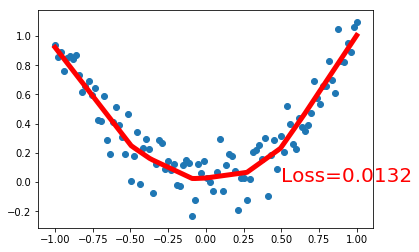

In [17]:
for step in range(100):
    # train and net output
    _, _l, _pred = sess.run([_train, _loss, _output], {_tf_x: _x, _tf_y: _y})
    if step % 100 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(_x, _y)
        plt.plot(_x, _pred, 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % _l, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()